### Импорт необходимых библиотек

In [1]:
%matplotlib inline
import numpy as np
import timeit
import seaborn as sns
import matplotlib.pyplot as plt

### Здесь описаны универсальные функции тестирования на корректность и время выполнения, а также фукция отрисовки графиков по полученным результатам

In [2]:
def test_accuracy(funcs, data_list, metric_func, data_many=True):
    ''' Проверка на правильность (все методы тестируются на одних данных и результаты сравниваются)
        возвращает True только если все результаты одинаковые
    '''
    for data in data_list:
        result = []
        for func in funcs:
            if data_many:
                result.append(func(*data))
            else:
                result.append(func(data))
        if not metric_func(result):
            print('mismatch', result)
            return False
    return True

In [3]:
def test_performance(func, data_list, loop=1000, data_many=True):
    res_arr = []
    for i in range(len(data_list)):
        if data_many:
            result = timeit.timeit(lambda: func(*data_list[i]), number=loop)
        else:
            result = timeit.timeit(lambda: func(data_list[i]), number=loop)
        res_arr.append(result / loop)
    return res_arr

In [4]:
def plot_results(res_arr):
    fig = plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1).set_title('Все варианты')

    for i in range(len(res_arr)):
        label = res_arr[i][0]
        data_list = res_arr[i][1]
        print(label, data_list)
        sns.lineplot(x = [x for x in range(1, len(data_list)+1)], y=data_list, legend='full', label = label)
        plt.ylabel('время выполнения в секундах')
        plt.xlabel('наборы данных')
    
    
    plt.subplot(2, 1, 2).set_title('Без циклов')
    for i in range(1, len(res_arr)):
        label = res_arr[i][0]
        data_list = res_arr[i][1]
        sns.lineplot(x = [x for x in range(1, len(data_list)+1)], y=data_list, legend='full', label = label)
        plt.ylabel('время выполнения в секундах')
        plt.xlabel('наборы данных')
    plt.show()

# Максимум 5 баллов - по ~0.7 баллов за задание

### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. 
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

##  1.1 циклы

In [79]:
#  1.1 циклы
def diag_cycle(X):
    length = min(len(X), len(X[0]))
    mult = 1
    for i in range(length):
        if X[i][i] != 0:
            mult *= X[i][i]
    return mult

## 1.2 Полностью векторизированный вариант

In [80]:
# 1.2 Полностью векторизированный вариант
def diag_vect(X):
    test = np.eye(*X.shape)*X
    result = test[test!=0].prod()
    return result

## 1.3 3-й вариант

In [7]:
# 1.3 3-й вариант
def diag_mixed(X):
    test = np.eye(*X.shape)*X
    ar = test[test!=0]
    mult = 1
    for elem in ar:
        mult *= elem
    return mult

In [8]:
# Задаем тестовые данные
diag_test_data = [np.random.randint(5, size=(4,3)).astype(float),
                 np.random.randint(5, size=(100,120)).astype(float),
                 np.random.randint(5, size=(1001,1000)).astype(float)]

In [9]:
# Описываем функцию проверки
def diag_metric(results):
    if len(set(results)) != 1:
        return False
    return True

In [10]:
# Тестируем все 3 функции на правильность работы, если все функции показывают одинаковый результат на тестовых данных,
# то получим значение True
test_accuracy([diag_cycle, diag_vect, diag_mixed], diag_test_data, diag_metric, data_many=False)

True

In [11]:
# получаем результаты времени выполнения каждой функции
diag_results = [('циклы', test_performance(diag_cycle, diag_test_data, data_many=False)),
               ('векторы', test_performance(diag_vect, diag_test_data, data_many=False)),
               ('3-й вариант', test_performance(diag_mixed, diag_test_data, data_many=False))]

In [12]:
diag_results

[('циклы',
  [1.7027999999998933e-06, 3.7913200000000205e-05, 0.00034530139999999987]),
 ('векторы',
  [4.514499999999977e-06, 1.3212000000000223e-05, 0.007129497499999999]),
 ('3-й вариант',
  [8.713699999999491e-06, 3.3012699999998675e-05, 0.009515662700000002])]

In [ ]:
# Значения которые получились у меня при выполнении
# diag_results = [('циклы',
#    [3.6629999999995277e-06, 6.583639999999847e-05, 0.0004840377999999994]),
#   ('векторы',
#    [5.332299999999179e-06, 1.7857200000001683e-05, 0.011685590600000002]),
#   ('3-й вариант',
#    [1.237769999999827e-05, 5.837009999999765e-05, 0.011527933200000003])]

циклы [1.7027999999998933e-06, 3.7913200000000205e-05, 0.00034530139999999987]
векторы [4.514499999999977e-06, 1.3212000000000223e-05, 0.007129497499999999]
3-й вариант [8.713699999999491e-06, 3.3012699999998675e-05, 0.009515662700000002]


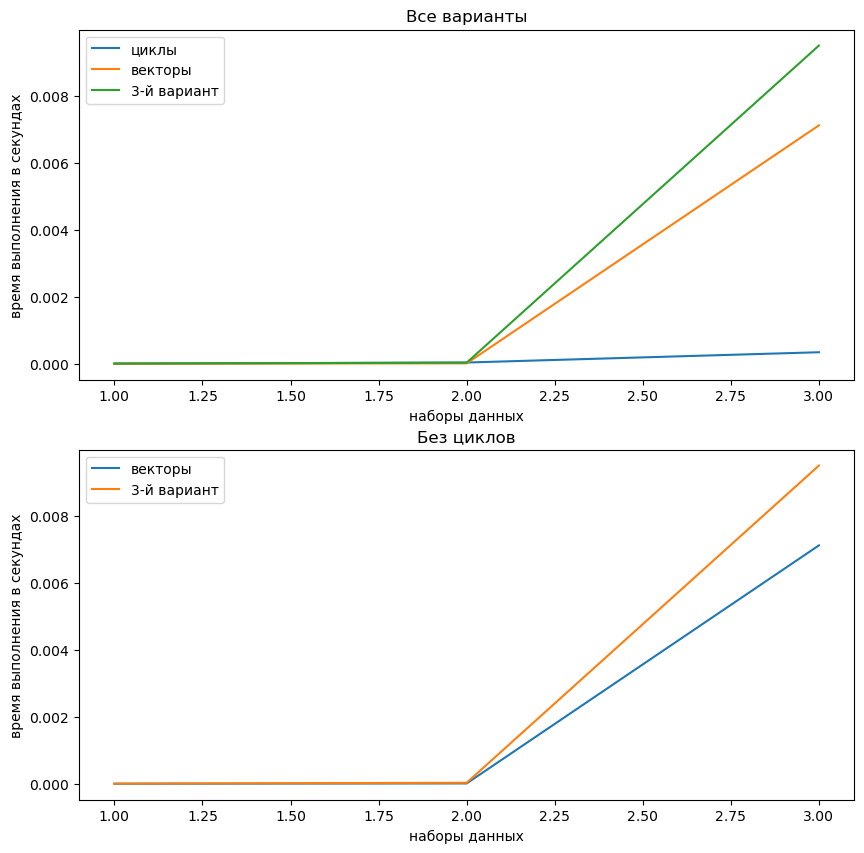

In [13]:
# Строим график времени выполнения
plot_results(diag_results)

#### Выводы по задаче 1
Для меня было удивительно, что в данной задаче циклическое решение на голову превосходит остальные по времени выполнения. Я могу объяснить это тем, что цикл здесь линейный а не квадратичный, а остальные решения в том или ином виде взаимодействуют со всеми элементами матрицы.

### 2. Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

## 2.1 Решение с циклами

In [14]:
# 2.1 Решение с циклами
def create_vect_cycle(X, i, j):
    length = len(i)
    vect = []
    for k in range(length):
        vect.append(X[i[k], j[k]])
    return np.array(vect)

## 2.2 Полностью векторное решение

In [15]:
# 2.2 Полностью векторное решение
def create_vect_vect(X, i, j):
    return X[i,j]

## 3.3 Третий вариант решения

In [16]:
# 3.3 Третий вариант решения
def create_vect_mixed(X, i, j):
    coords = list(zip(i, j))
    vect = []
    for coord in coords:
        vect.append(X[coord])
    return np.array(vect)

In [17]:
# Задаем тестовые данные
create_vect_test_data = [(np.random.randint(5, size=(100,100)).astype(float), 
                          np.random.randint(99, size=(100)),
                          np.random.randint(99, size=(100))),
                         (np.random.randint(5, size=(1000,1000)).astype(float), 
                          np.random.randint(999, size=(1000)),
                          np.random.randint(999, size=(1000))),
                         (np.random.randint(5, size=(10000,10000)).astype(float), 
                          np.random.randint(9999, size=(10000)),
                          np.random.randint(9999, size=(10000))),]

In [18]:
# Описываем функцию проверки
def create_vect_metric(results):
    for i in range(len(results)-1):
        current = results[i]
        nextt = results[i+1]
        if not (current == nextt).all():
            return False
    return True

In [19]:
# Тестируем все 3 функции на правильность работы, если все функции показывают одинаковый результат на тестовых данных,
# то получим значение True
test_accuracy([create_vect_cycle, create_vect_vect, create_vect_mixed], create_vect_test_data, create_vect_metric)

True

In [20]:
# получаем результаты времени выполнения каждой функции
create_vect_performance_data = [('цикл', test_performance(create_vect_cycle, create_vect_test_data)),
                            ('вектор', test_performance(create_vect_vect, create_vect_test_data)),
                            ('3-й вариант', test_performance(create_vect_mixed, create_vect_test_data)),]

In [21]:
create_vect_performance_data

[('цикл', [7.519160000000014e-05, 0.0007790101999999983, 0.0054129225]),
 ('вектор',
  [4.7385000000019774e-06, 1.2504299999999802e-05, 0.00020157100000000127]),
 ('3-й вариант',
  [4.250079999999912e-05, 0.00037853690000000026, 0.004973499699999998])]

In [ ]:
# Значения которые получились у меня при выполнении
# create_vect_performance_data = [('цикл',
#   [5.1884499999999886e-05, 0.0005062362000000036, 0.005366600500000004]),
#  ('вектор',
#   [2.621900000001176e-06, 1.1377899999999385e-05, 0.00014261069999999877]),
#  ('3-й вариант',
#   [2.958579999999955e-05, 0.0002990021999999968, 0.004777236100000003])]

цикл [7.519160000000014e-05, 0.0007790101999999983, 0.0054129225]
вектор [4.7385000000019774e-06, 1.2504299999999802e-05, 0.00020157100000000127]
3-й вариант [4.250079999999912e-05, 0.00037853690000000026, 0.004973499699999998]


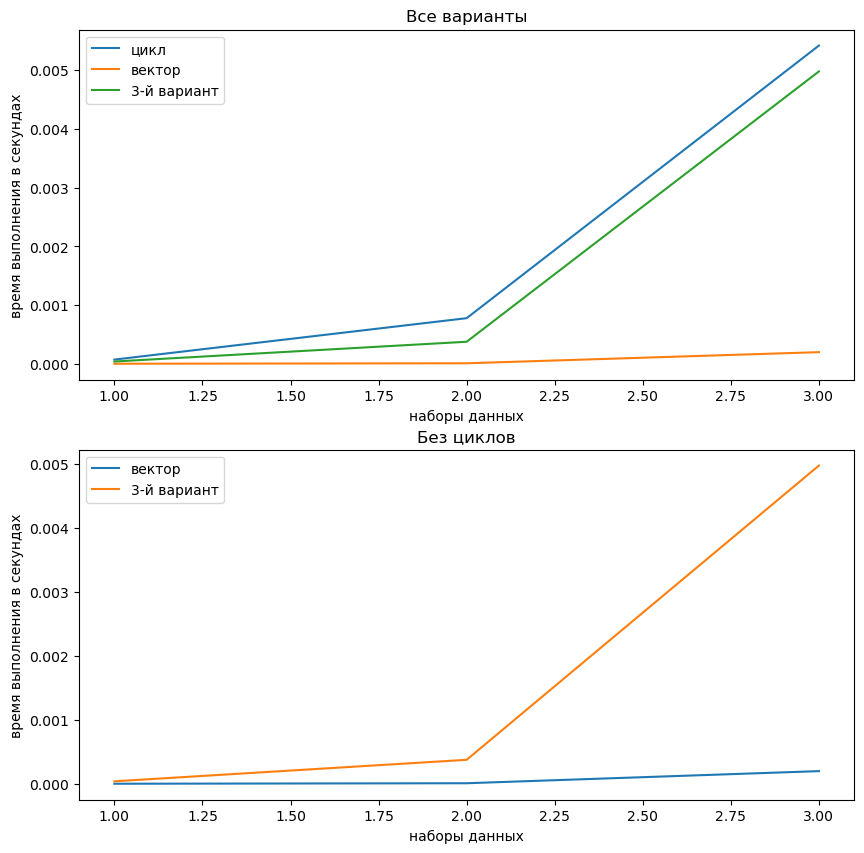

In [82]:
# Строим график времени выполнения
plot_results(create_vect_performance_data)

#### Выводы по задаче 2
Эта задача никаких сюрпризов не преподнесла, здесь быстрее работает алгоритм основанный на матричных вычислениях, 3-й вариант построенный с использованием "синтаксического сахара" Python, но основанный на циклах демонстрирует такую же скорость работы, как и полностью циклическое решение, вычислительная сложность отличается на константу.

### 3. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество. 
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

## 3.1 решение с циклами

In [23]:
# 3.1 решение с циклами
def multiset_cycle(x, y):
    x.sort()
    y.sort()
    if len(x) != len(y):
        return False
    for i in range(len(x)):
        if x[i] != y[i]:
            return False
    return True

## 3.2 Полностью векторизованное решение

In [24]:
# 3.2 Полностью векторизованное решение
def multiset_vect(x, y):
    result = np.array_equal(np.sort(x.flat), np.sort(y.flat))
    return result

## 3.3 Смешанное решение

In [25]:
# 3.3 Смешанное решение
def multiset_mixed(x, y):
    d_x = dict()
    d_y = dict()
    if len(x) != len(y):
        return False
    for i in range(len(x)):
        d_x[x[i]] = d_x.get(x[i], 0) + 1
        d_y[y[i]] = d_y.get(y[i], 0) + 1
    numbers_x = np.array(sorted(d_x.keys()))
    numbers_y = np.array(sorted(d_y.keys()))
    count_x = np.array([d_x[i] for i in numbers_x])
    count_y = np.array([d_y[i] for i in numbers_y])
    if len(numbers_x) == len(numbers_y) and (numbers_x == numbers_y).all() and len(count_x) == len(count_y) and (count_x == count_y).all():
        return True
    return False
    

In [26]:
def multiset_generate_test_data():
    '''Функция генерирует тестовые данные, таким образом, чтобы первые 3 варианта предполагали значение True на выходе,
       и следующие 3 варианта -- False
    '''
    x = [np.random.randint(99, size=(100)),
        np.random.randint(99, size=(1000)),
        np.random.randint(99, size=(10000))]
#     x1 = np.random.shuffle(x[1])
    y = [np.array(x[i], copy=True) for i in range(len(x))]
    for el in y:
        np.random.shuffle(el)
    z = [np.random.randint(99, size=(100)),
        np.random.randint(99, size=(1000)),
        np.random.randint(99, size=(10000))]
    print(y)
    result_data = [(x[i], y[i]) for i in range(len(x))] + [(x[i], z[i]) for i in range(len(x))]
    return result_data

In [27]:
%%capture
# Задаем тестовые данные
multiset_test_data = multiset_generate_test_data();

In [28]:
# Описываем функцию проверки
def multiset_metric(results):
    for i in range(len(results)-1):
        current = results[i]
        nextt = results[i+1]
        if not current == nextt:
            return False
    return True

In [29]:
# Тестируем все 3 функции на правильность работы, если все функции показывают одинаковый результат на тестовых данных,
# то получим значение True
test_accuracy([multiset_cycle, multiset_vect, multiset_mixed], multiset_test_data, multiset_metric)

True

In [30]:
# получаем результаты времени выполнения каждой функции
multiset_performance_data = [('цикл', test_performance(multiset_cycle, multiset_test_data)),
                               ('вектор', test_performance(multiset_vect, multiset_test_data)),
                               ('3-й вариант', test_performance(multiset_mixed, multiset_test_data))]

In [31]:
multiset_performance_data

[('цикл',
  [5.134670000000341e-05,
   0.00023331089999999933,
   0.0022501583000000026,
   2.3718999999999823e-06,
   1.3330400000000964e-05,
   0.000165649099999996]),
 ('вектор',
  [1.0542100000002108e-05,
   2.3830599999996593e-05,
   0.00016012229999999762,
   1.2332900000004088e-05,
   2.2650999999996202e-05,
   0.000178781800000003]),
 ('3-й вариант',
  [0.0001116242000000014,
   0.0007696152999999981,
   0.007257118800000001,
   0.00010150689999999685,
   0.0007651445000000052,
   0.007046343199999996])]

In [ ]:
# Значения которые получились у меня при выполнении
# multiset_performance_data = [('цикл',
#   [3.867129999999719e-05,
#    0.00039783080000000125,
#    0.0023493536000000004,
#    1.8832000000017502e-06,
#    1.2188799999997002e-05,
#    0.000164482900000003]),
#  ('вектор',
#   [1.1398200000002135e-05,
#    1.8836100000001464e-05,
#    0.0001457314000000025,
#    1.2013500000001898e-05,
#    2.3028099999997663e-05,
#    0.0001680054999999996]),
#  ('3-й вариант',
#   [0.00011029360000000565,
#    0.0007907308999999998,
#    0.007160765300000002,
#    0.0001239182999999997,
#    0.0008968389000000059,
#    0.007260132800000008])]

цикл [5.134670000000341e-05, 0.00023331089999999933, 0.0022501583000000026, 2.3718999999999823e-06, 1.3330400000000964e-05, 0.000165649099999996]
вектор [1.0542100000002108e-05, 2.3830599999996593e-05, 0.00016012229999999762, 1.2332900000004088e-05, 2.2650999999996202e-05, 0.000178781800000003]
3-й вариант [0.0001116242000000014, 0.0007696152999999981, 0.007257118800000001, 0.00010150689999999685, 0.0007651445000000052, 0.007046343199999996]


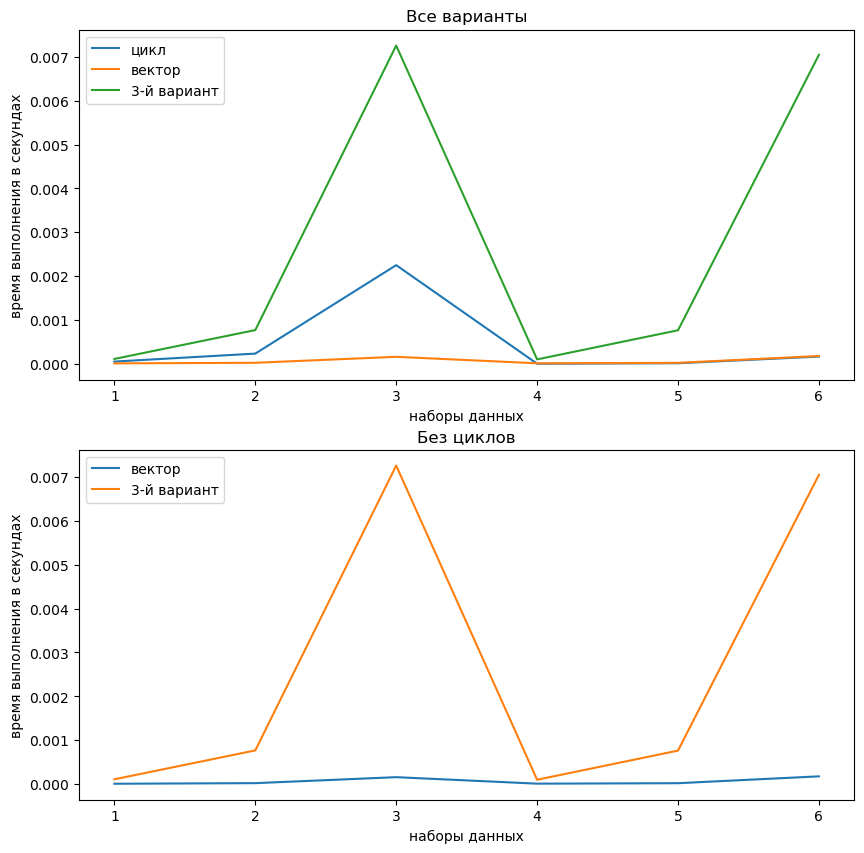

In [32]:
# Строим график времени выполнения
plot_results(multiset_performance_data)

#### Выводы по задаче 3
По результатам тестирования оказалось, что 3-й вариант решения самый неэффективный по времени, он работает одинаково плохо как на данных, предполагающих True, так и на данных предполагающих False. Чисто циклическое решение плохо работает на положительных вариантах и хорошо, когда данные предполагают отрицательный ответ. Векторное решение показало стабильно хороший результат.

### 4. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. 
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

## 4.1 решение с циклами

In [33]:
# 4.1 решение с циклами
def max_elem_cycle(X):
    max_elem = 0
    length = len(X)
    for i in range(length):
        if X[i] == 0 and i + 1 < length:
            max_elem = max(max_elem, X[i+1])
    return max_elem

## 4.2 полностью векторизованное решение

In [34]:
# 4.2 полностью векторизованное решение
def max_elem_vect(X):
    mask = X == 0
    values = X[np.concatenate([np.array([False]), mask])[:-1]]
    if len(values):
        result = values.max()
    else:
        return 0
    return result

## 4.3 3-й вариант решения

In [35]:
# 4.3 3-й вариант решения
def max_elem_mixed(X):
    indexes = np.array(np.where(X == 0))[0] + 1
    length = len(X)
    if not len(indexes):
        return 0
    if indexes[-1] == length:
        indexes = indexes[:-1]
    return X[indexes].max()

In [36]:
# Задаем тестовые данные
max_elem_test_data = [np.random.randint(50, size=(100)),
                     np.random.randint(50, size=(1000)),
                     np.random.randint(50, size=(10000)),]

In [37]:
# Описываем функцию проверки
def max_elem_metric(results):
    if len(set(results)) != 1:
        return False
    return True

In [38]:
# Тестируем все 3 функции на правильность работы, если все функции показывают одинаковый результат на тестовых данных,
# то получим значение True
test_accuracy([max_elem_cycle, max_elem_vect, max_elem_mixed], max_elem_test_data, max_elem_metric, data_many=False)

True

In [76]:
# получаем результаты времени выполнения каждой функции
max_elem_performance_data = [('цикл', test_performance(max_elem_cycle, max_elem_test_data, data_many=False, loop = 10000)),
                               ('вектор', test_performance(max_elem_vect, max_elem_test_data, data_many=False, loop = 10000)),
                               ('3-й вариант', test_performance(max_elem_mixed, max_elem_test_data, data_many=False, loop = 10000))]

In [77]:
max_elem_performance_data

[('цикл',
  [1.0290299999996932e-05, 9.488512999998874e-05, 0.0009903527100000018]),
 ('вектор',
  [4.033239999989746e-06, 4.7374300000001314e-06, 1.0092529999997168e-05]),
 ('3-й вариант',
  [4.572230000007948e-06, 5.1557499999944415e-06, 1.0742470000013782e-05])]

In [ ]:
# Значения которые получились у меня при выполнении
# max_elem_performance_data = [('цикл',
#   [1.1175299999990784e-05, 0.0001101524999999981, 0.0014519468000000018]),
#  ('вектор',
#   [5.802000000002749e-06, 6.996999999998365e-06, 1.3572499999995102e-05]),
#  ('3-й вариант',
#   [5.716300000003116e-06, 6.731200000004378e-06, 1.240669999999966e-05])]

цикл [1.0290299999996932e-05, 9.488512999998874e-05, 0.0009903527100000018]
вектор [4.033239999989746e-06, 4.7374300000001314e-06, 1.0092529999997168e-05]
3-й вариант [4.572230000007948e-06, 5.1557499999944415e-06, 1.0742470000013782e-05]


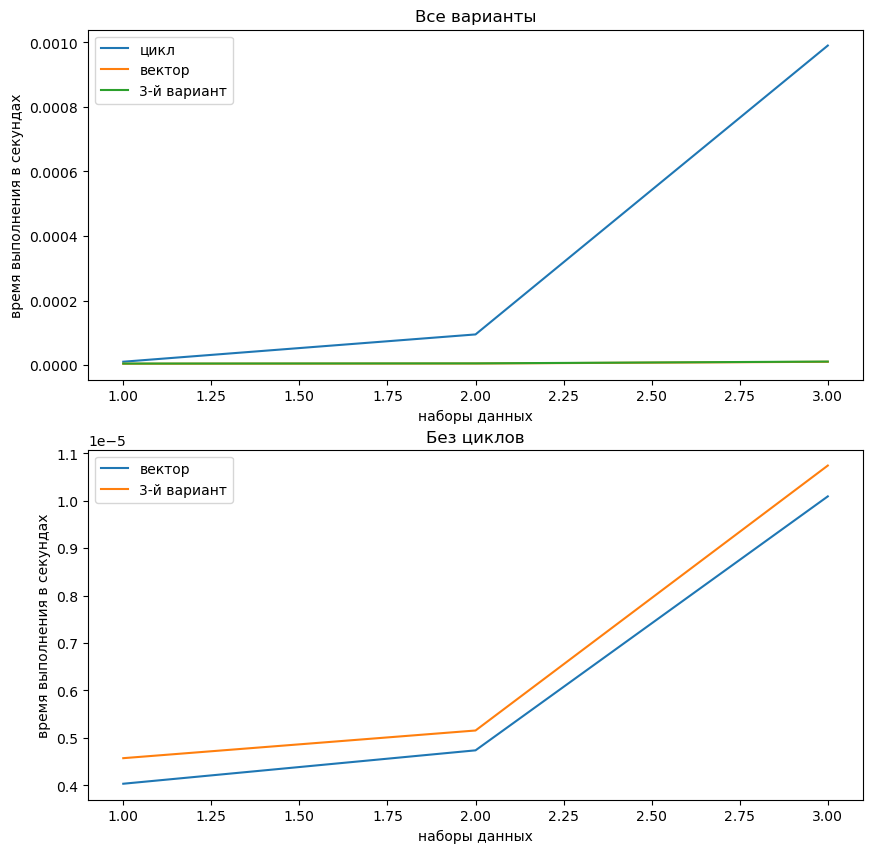

In [78]:
# Строим график времени выполнения
plot_results(max_elem_performance_data)

#### Выводы по задаче 4
Решение с циклами предсказуемо оказалось самым медленным, однако среди оставшихся двух вариантов самый быстрый оказалось определить сложно, так как оба решения не используют циклы и при многократных запусках то один, то другой выполняется быстрее, это также сильно зависит от вычислительной машины (проверил на 3-х компьютерах)

### 5. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

In [42]:
import imageio
import matplotlib.pyplot as plt

In [ ]:
# im = imageio.v2.imread('g_icon.png')
# plt.imshow(im)
# im2 = im[:,:,:-1]
# im2[0,0]

## 5.1 Решение с циклами

In [43]:
# 5.1 Решение с циклами
def weidget_summ(X):
    w = np.array([0.299, 0.587, 0.114])
    result = X[0] * w[0] + X[1] * w[1] + X[2] * w[2]
    return result

def img_cycle(img):
    new_img = np.zeros((img.shape[:2]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img[i][j] = weidget_summ(img[i,j])
    return new_img

## 5.2 Полностью векторизованное решение

In [44]:
# 5.2 Полностью векторизованное решение
def img_vect(img):
    return np.dot(img[..., :3], [0.299, 0.587, 0.114])

## 5.3 3-й Вариант решения

In [45]:
# 5.2 3-й Вариант решения
def img_mixed(img):
    r = img[:,:, 0]
    g = img[:,:, 1]
    b = img[:,:, 2]
    w = np.array([0.299, 0.587, 0.114])
    new_img = r * w[0] + g * w[1] + b * w[2]
    return new_img

In [81]:
# Задаем тестовые данные
img_test_data = [np.random.randint(255, size=(20, 25, 3)),
                 np.random.randint(255, size=(100, 101, 3)),
                 np.random.randint(255, size=(1010, 1000, 3)),]

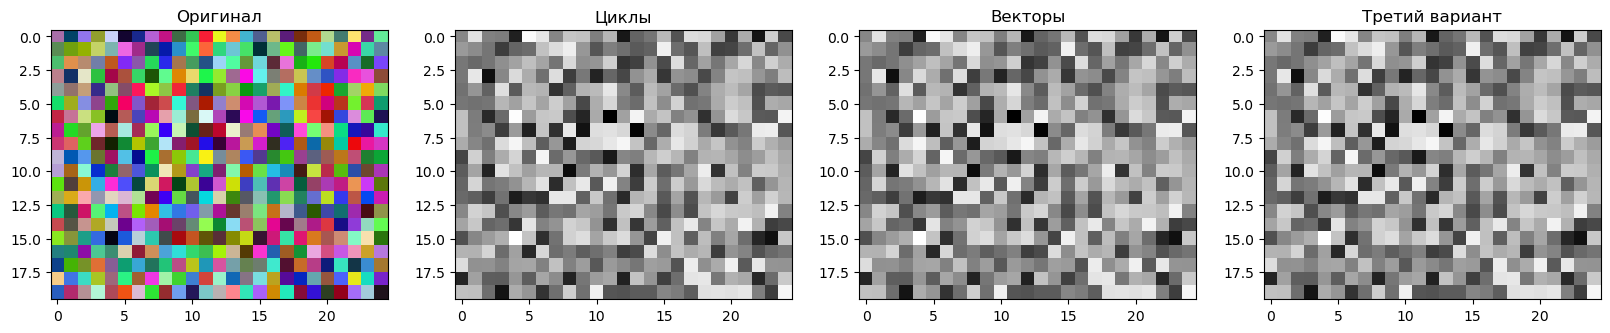

In [47]:
fig = plt.figure(figsize=(20, 20))

plt.subplot(1, 4, 1).set_title('Оригинал')
plt.imshow(img_test_data[0])
plt.subplot(1, 4, 2).set_title('Циклы')
plt.imshow(img_cycle(img_test_data[0]), cmap='Greys')
plt.subplot(1, 4, 3).set_title('Векторы')
plt.imshow(img_vect(img_test_data[0]), cmap='Greys')
plt.subplot(1, 4, 4).set_title('Третий вариант')
plt.imshow(img_mixed(img_test_data[0]), cmap='Greys')

plt.show()

In [48]:
# Описываем функцию проверки
def img_metric(results):
    for i in range(len(results)-1):
        current = np.round(results[i], 3)
        nextt = np.round(results[i+1], 3)
        if not (current == nextt).all():
            print(i)
            return False
    return True

In [49]:
# Тестируем все 3 функции на правильность работы, если все функции показывают одинаковый результат на тестовых данных,
# то получим значение True
test_accuracy([img_cycle, img_vect, img_mixed], img_test_data, img_metric, data_many=False)

True

In [50]:
# получаем результаты времени выполнения каждой функции
img_performance_data = [('циклы', test_performance(img_cycle, img_test_data, data_many=False, loop = 10)),
               ('векторы', test_performance(img_vect, img_test_data, data_many=False, loop = 10)),
               ('3-й вариант', test_performance(img_mixed, img_test_data, data_many=False, loop = 10))]

In [51]:
img_performance_data

[('циклы', [0.004597890000000149, 0.026373369999999598, 2.4420988599999993]),
 ('векторы',
  [3.54200000003857e-05, 0.00033647000000058824, 0.04648222000000004]),
 ('3-й вариант',
  [2.2309999999947648e-05, 5.785000000031459e-05, 0.024735199999999225])]

In [ ]:
# Значения которые получились у меня при выполнении
# img_performance_data = [('циклы', [0.0027715999999998074, 0.024684489999999927, 2.3757301400000004]),
#  ('векторы',
#   [2.8299999999603643e-05, 0.00021749999999940429, 0.03876520999999968]),
#  ('3-й вариант',
#   [2.107000000108883e-05, 4.517999999933409e-05, 0.027261900000000595])]

циклы [0.004597890000000149, 0.026373369999999598, 2.4420988599999993]
векторы [3.54200000003857e-05, 0.00033647000000058824, 0.04648222000000004]
3-й вариант [2.2309999999947648e-05, 5.785000000031459e-05, 0.024735199999999225]


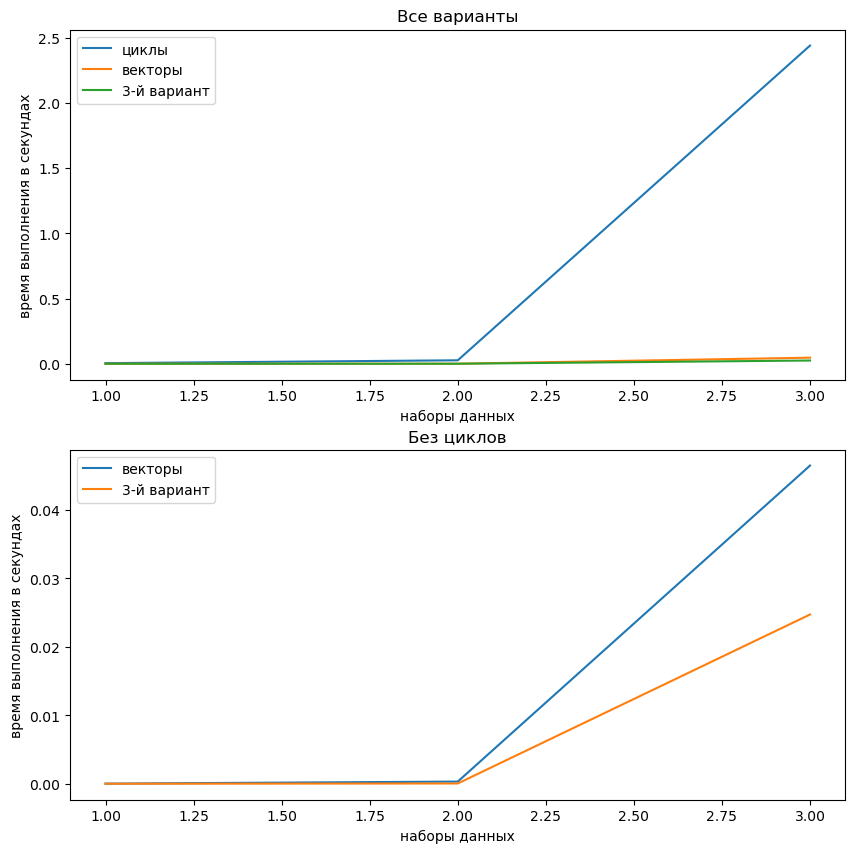

In [52]:
# Строим график времени выполнения
plot_results(img_performance_data)

#### Выводы по задаче 5
В этой задаче циклическое решение предсказуемо самое неэффективное, интерес представляют два других решения, они оба являются чисто векторными, однако "3-й вариант" оказался эффективнее, из чего можно сделать вывод, что в библиотеке numpy быстрее выполняются операции поэлементного сложения и поэлементного умножения на число, нежели векторное умножение матриц.

### 6. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить. 
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). Ответ: (np.array([2, 3, 5, 2]), np.array([3, 3, 1, 2])).

## 6.1 Решение с циклами

In [53]:
# 6.1 Решение с циклами
def encode_cycle(X):
    in_sequence = False
    values = []
    count = []
    for i in range(len(X)):
        if in_sequence:
            if X[i] != X[i-1]:
                in_sequence = False
            else:
                count[-1] += 1
        if not in_sequence:
            values.append(X[i])
            count.append(1)
            in_sequence = True
    return [np.array(values), np.array(count)]

## 6.2 Полностью векторизованное решение

In [54]:
# 6.2 Полностью векторизованное решение
def encode_vect(X):
    clear_mask = X[1:] != X[:-1]
    mask = np.append(np.where(clear_mask), len(X)-1)
    count = np.diff(np.append(-1, mask))
    values = X[mask]
    return [np.array(values), np.array(count)]

## 6.3 3-й вариант решения

In [55]:
# 6.3 3-й вариант решения
def encode_mixed(X):
    dict_X = {}
    k = 0
    for i in range(len(X)):
        dict_X.setdefault(tuple([X[i], k]), []).append(X[i])
        if i+1 < len(X) and X[i] != X[i+1]:
            k += 1
            
    items = sorted(dict_X.items(), key=lambda x : x[0][1])
    values = [el[0][0] for el in items]
    count = [len(el[1]) for el in items]
    return [np.array(values), np.array(count)]

In [56]:
def encode_generate_test_data():
    base = [np.random.randint(50, size=(10)),
            np.random.randint(50, size=(100)),
            np.random.randint(50, size=(1000))]
    
    true_tests = [np.repeat(x, 10) for x in base]
    
    false_tests = [np.random.randint(50, size=(100)),
                   np.random.randint(50, size=(1000)),
                   np.random.randint(50, size=(10000))]
    result_tests = true_tests + false_tests
    return result_tests

In [57]:
# Задаем тестовые данные
encode_test_data = encode_generate_test_data()

In [58]:
# Описываем функцию проверки
def encode_metric(results):
    for i in range(len(results)-1):
        current = results[i]
        nextt = results[i+1]
        if not ((current[0][0] == nextt[0][0]).all() and (current[0][1] == nextt[0][1]).all()):
            return False
    return True

In [59]:
# Тестируем все 3 функции на правильность работы, если все функции показывают одинаковый результат на тестовых данных,
# то получим значение True
test_accuracy([encode_cycle, encode_vect, encode_mixed], encode_test_data, encode_metric, data_many=False)

True

In [60]:
# получаем результаты времени выполнения каждой функции
encode_performance_data = [('цикл', test_performance(encode_cycle, encode_test_data, data_many=False)),
                               ('вектор', test_performance(encode_vect, encode_test_data, data_many=False)),
                               ('3-й вариант', test_performance(encode_mixed, encode_test_data, data_many=False))]

In [61]:
encode_performance_data

[('цикл',
  [4.121229999999798e-05,
   0.00040186269999999526,
   0.003962907200000003,
   5.990160000000344e-05,
   0.0005792325999999974,
   0.005892232100000001]),
 ('вектор',
  [1.757959999999059e-05,
   1.7279399999992505e-05,
   3.088089999999966e-05,
   2.050459999999532e-05,
   2.784299999999007e-05,
   6.373419999999897e-05]),
 ('3-й вариант',
  [9.494259999999599e-05,
   0.000990519599999999,
   0.010021427599999995,
   0.0001353051999999906,
   0.0012282394000000068,
   0.0164536351])]

In [ ]:
# Значения которые получились у меня при выполнении
# encode_performance_data = [('цикл',
#   [4.1429700000009006e-05,
#    0.00046988070000000446,
#    0.003656889199999995,
#    4.499230000000409e-05,
#    0.0005335149999999942,
#    0.007604000400000004]),
#  ('вектор',
#   [4.119759999998962e-05,
#    2.224099999999396e-05,
#    3.870269999998754e-05,
#    2.0500100000006682e-05,
#    1.7943899999991685e-05,
#    4.6347099999991315e-05]),
#  ('3-й вариант',
#   [7.371500000000708e-05,
#    0.0008439960000000042,
#    0.00968711540000001,
#    0.000149003399999998,
#    0.0013176128000000063,
#    0.014866479500000026])]

цикл [4.121229999999798e-05, 0.00040186269999999526, 0.003962907200000003, 5.990160000000344e-05, 0.0005792325999999974, 0.005892232100000001]
вектор [1.757959999999059e-05, 1.7279399999992505e-05, 3.088089999999966e-05, 2.050459999999532e-05, 2.784299999999007e-05, 6.373419999999897e-05]
3-й вариант [9.494259999999599e-05, 0.000990519599999999, 0.010021427599999995, 0.0001353051999999906, 0.0012282394000000068, 0.0164536351]


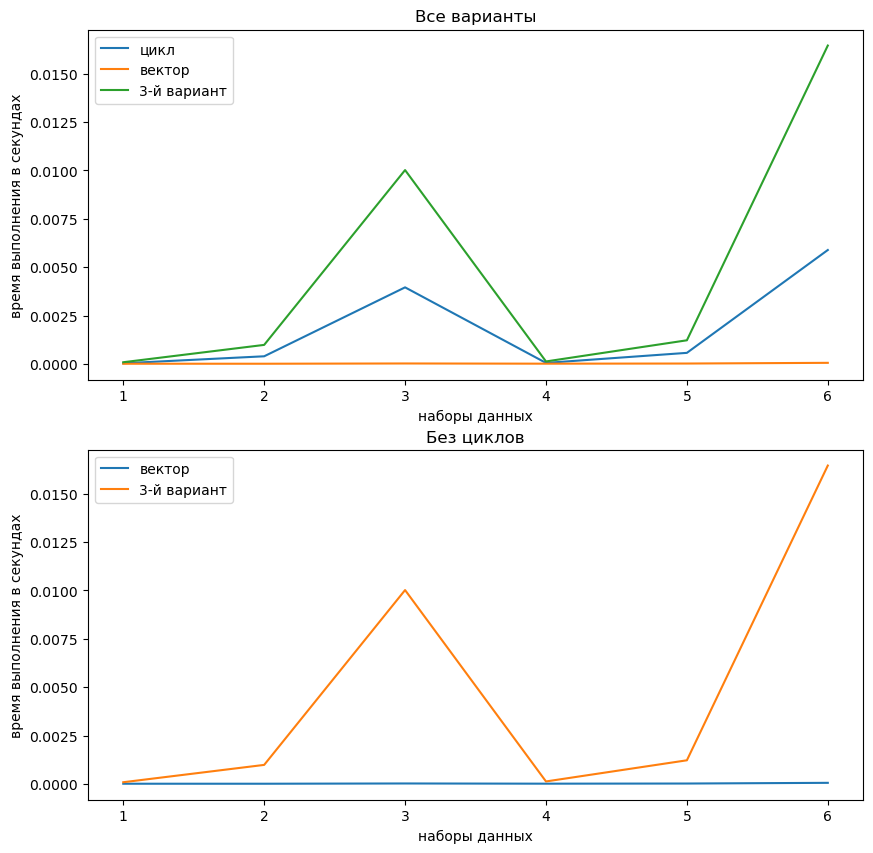

In [62]:
# Строим график времени выполнения
plot_results(encode_performance_data)

#### Выводы по задаче 6
В этой задаче самым неэффективным вариантом решения является "3-й вариант" так как в нем используется дополнительная сортировка, которой нет даже в чисто циклическом решении. А вот векторный вариант показал феноменальную эффективность и на всех используемых тестовых данных показал почти константное время.

### 7. Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

In [63]:
from scipy.spatial.distance import cdist

## 7.1 Решение с циклами

In [64]:
# 7.1 Решение с циклами
def calc_dist(x, y):
    length = len(x)
    summ = 0
    for i in range(length):
        summ += (x[i] - y[i])**2
    res_dist = np.sqrt(summ)
    return res_dist
    
def dist_cycle(X, Y):
    if len(X.shape) != 2 or len(Y.shape) != 2 or X.shape[1] != Y.shape[1]:
        print("ERROR", X.shape, Y.shape)
        return False
    
    dist_matrix = np.zeros((X.shape[0], Y.shape[0]))
    for k1 in range(X.shape[0]):
        for k2 in range(Y.shape[0]):
            dist_matrix[k1][k2] = calc_dist(X[k1], Y[k2])
    return dist_matrix

## 7.2 Полностью векторизованное решение

In [65]:
# 7.2 Полностью векторизованное решение
def dist_vect(X, Y):
    x = np.sum(X**2, axis=1)
    y = np.sum(Y**2, axis=1)
    xy = np.matmul(X, Y.T)
    x_t = x.reshape(-1, 1)
    dist_matrix = np.sqrt(x_t - 2*xy + y)
    return dist_matrix

## 7.3 Третий вариант решения

In [66]:
# 7.3 Третий вариант решения
def dist_mixed(X, Y):
    diff = X[:, :, None] - Y[:, :, None].T
    square_matrix = (diff * diff).sum(1)
    dist_matrix = np.sqrt(square_matrix)
    return dist_matrix

In [67]:
# Задаем тестовые данные
dist_test_data = [(np.random.randint(5, size=(20,10)),np.random.randint(5, size=(25,10))),
                  (np.random.randint(5, size=(47,50)),np.random.randint(5, size=(39,50))),
                  (np.random.randint(5, size=(120,100)),np.random.randint(5, size=(110,100)))]

In [68]:
# Описываем функцию проверки
def dist_metric(results):
    for i in range(len(results)-1):
        current = results[i]
        nextt = results[i+1]
        if not (current == nextt).all():
            print(i)
            return False
    return True

In [69]:
# Тестируем все 3 функции на правильность работы, если все функции показывают одинаковый результат на тестовых данных,
# то получим значение True
test_accuracy([dist_cycle, dist_vect, dist_mixed, cdist], dist_test_data, dist_metric)

True

In [70]:
# получаем результаты времени выполнения каждой функции
dist_performance_data = [('цикл', test_performance(dist_cycle, dist_test_data, loop=500)),
                               ('вектор', test_performance(dist_vect, dist_test_data, loop=500)),
                               ('3-й вариант', test_performance(dist_mixed, dist_test_data, loop=500)),
                                ('cdist', test_performance(cdist, dist_test_data, loop=500))]

In [71]:
dist_performance_data

[('цикл', [0.00459577379999996, 0.03630763560000003, 0.5238708228000001]),
 ('вектор',
  [2.6321199999983945e-05, 0.00020898879999992913, 0.003186586600000055]),
 ('3-й вариант',
  [3.795740000009573e-05, 0.00024016359999995984, 0.006565326999999911]),
 ('cdist',
  [1.1900800000034906e-05, 7.037939999997888e-05, 0.0008187725999999884])]

In [ ]:
# Значения которые получились у меня при выполнении
# dist_performance_data = [('цикл', [0.003012100400000236, 0.034701165200000106, 0.47359049019999927]),
#  ('вектор',
#   [2.1570199999587202e-05, 0.00021569480000016483, 0.003092456599999423]),
#  ('3-й вариант',
#   [2.6483399999960967e-05, 0.00021710819999952945, 0.005828369199999543]),
#  ('cdist',
#   [1.5526799999861397e-05, 8.16928000003827e-05, 0.0008265481999997064])]

цикл [0.00459577379999996, 0.03630763560000003, 0.5238708228000001]
вектор [2.6321199999983945e-05, 0.00020898879999992913, 0.003186586600000055]
3-й вариант [3.795740000009573e-05, 0.00024016359999995984, 0.006565326999999911]
cdist [1.1900800000034906e-05, 7.037939999997888e-05, 0.0008187725999999884]


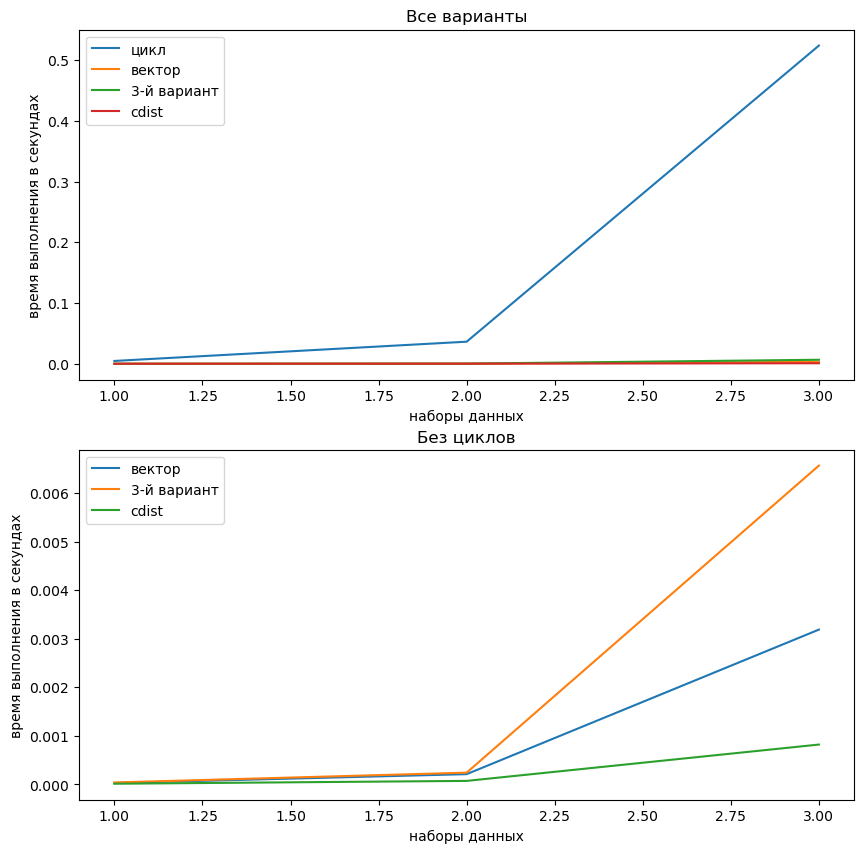

In [72]:
# Строим график времени выполнения
plot_results(dist_performance_data)

#### Выводы по задаче 3
В тестировании решения этой задачи были задействованы 4 функции, одна из которых специально разработана в библиотеке scipy для измерения расстояния. В целом по результатам тестирования можно сказать, что любое решение помимо циклического даёт хороший результат, однако если стремиться максимально оптимизировать решение, то лучше использовать специально разработанные функции, так как даже с использованием векторных вычислений библиотеги numpy задача решается дольше.

##### Замечание. Можно считать, что все указанные объекты непустые (к примеру, в задаче №1 на диагонали матрицы есть ненулевые элементы).
Полезные функции NumPy: np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid,
np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where,
np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique,
np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot, np.linalg.inv, np.linalg.solve.
Многие из этих функций можно использовать так: x.argmin().

# Для каждой из задач:
(a) Написать на Python + NumPy несколько вариантов кода различной эффективности. Должно быть не
менее трёх вариантов, в том числе как минимум один полностью векторизованный вариант (без циклов), и один
вариант без векторизации (с циклами). Третий вариант решения — на ваше усмотрение, например, это может быть
наиболее хорошо читаемый способ решения, или частично векторизованный вариант. Все пункты выполнять в одном google collab, разделяя их пунктами 1., 1.1, 1.2, 1.3; 2., 2.1, 2.2, 2.3; и тд.

(b) Сравнить в IPython Notebook при помощи %timeit скорость работы на нескольких тестовых наборах
РАЗНОГО размера (минимум 3, причём отличаться размеры входных данных должны минимум на порядок. Например, массивы длины 100, 1000, 10000).

(c) Проанализировать полученные данные о скорости работы разных реализаций.

(d) Получить выводы.

In [ ]:
# Soft Deadline - 13 марта в 23:59
# Hard Deadline - 20 марта в 23:59

<font color='red'><h1>Общие выводы по домашнему заданию</h1></font>
В рамках выполненного домашнего задания были исследованы зависимости времени выполнения кода от различных реализаций алгоритмов. По итогам проделанной работы можно сказать, что методы решения задачь с помощью библиотеки numpy являются наиболее эффективными в большинстве случаев и хотя можно подобрать методы, работающие быстрее, функции библиотеки numpy работают за предсказуемое время, а это наиболее важно с точки зрения разработки. Также можно сделать вывод (на примере задачи 7), что наиболее эффективным способом решения задачи является использование специально разработанных под неё функций.